# 🛍️ Customer Segmentation using KMeans Clustering

## 📌 Objective
The goal of this project is to segment customers into distinct groups based on their **Annual Income** and **Spending Score** using **KMeans Clustering**. 

Customer segmentation helps businesses:
- Understand customer behavior and preferences
- Personalize marketing strategies
- Improve customer experience and retention

## 📊 Dataset Overview
The dataset used is from Kaggle's Mall Customer Segmentation Data:
- **CustomerID**: Unique ID for each customer
- **Age**: Customer age
- **Annual Income (k$)**: Customer income in thousands
- **Spending Score (1-100)**: A score assigned by the mall based on customer spending habits

# Step 1 : Data Loading & initial inspection

* Load the dataset using pandas

* Inspect first few rows, data types, and summary

* Check for missing values or duplicates

### Load the dataset

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("/kaggle/input/mall-customers-segmentation/Mall_Customers.csv")

### Inspect first few rows, data types, and summary

In [2]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


### Check for missing values or duplicates

In [5]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Step 2 : Exploratory Data Analysis (EDA)

* Distribution plots: Age, Income, Spending Score
* Relationship plots: Income vs Spending Score, Age vs Spending Score
* Check gender distribution
* Use pair plots or scatter plots to visualize trends

### Set a consistent style

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

### Gender Distribution

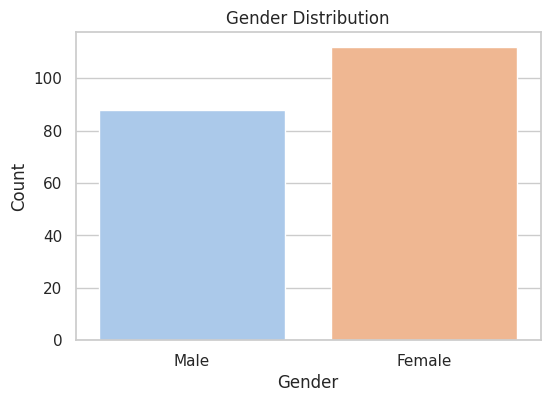

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Genre', data = df, palette = 'pastel')
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Distribution Plots

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


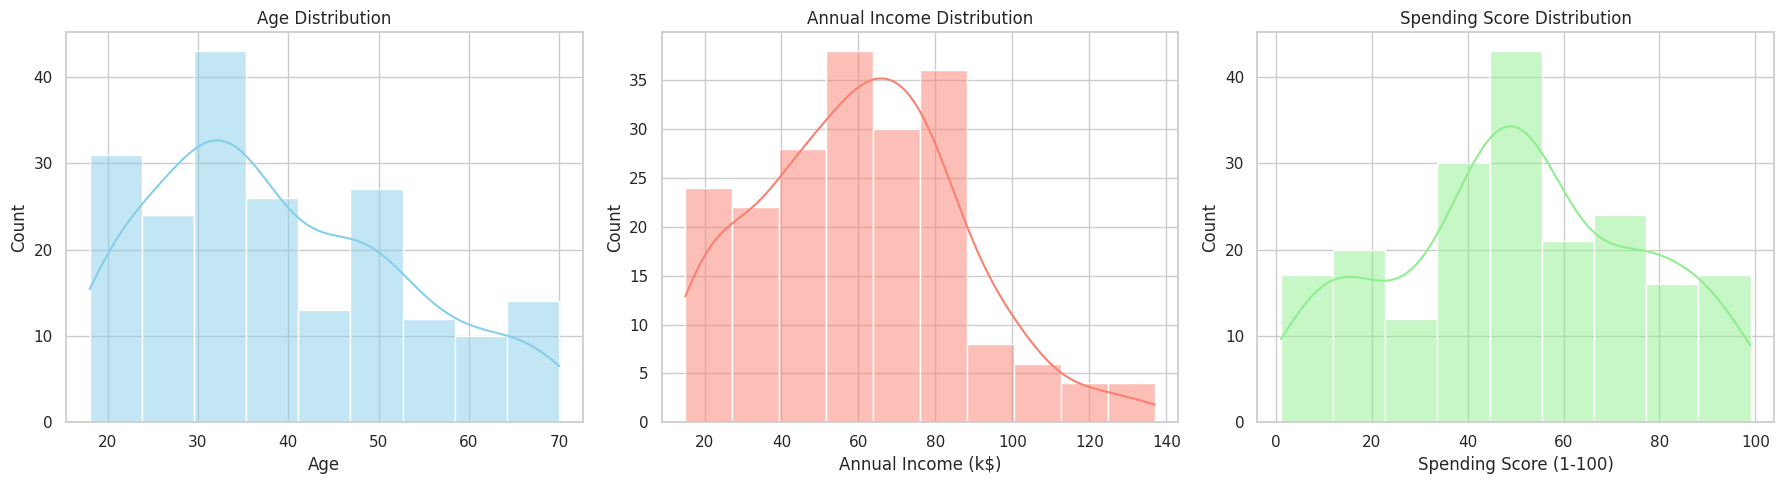

In [8]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

sns.histplot(df['Age'], kde = True, ax = axes[0], color = 'skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], kde = True, ax = axes[1], color = 'salmon')
axes[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], kde = True, ax = axes[2], color = 'lightgreen')
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

### Relationship Plots

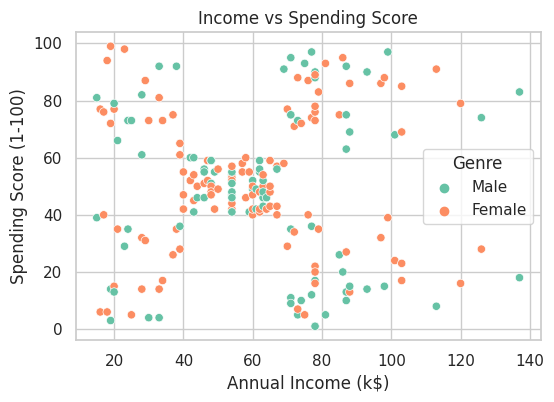

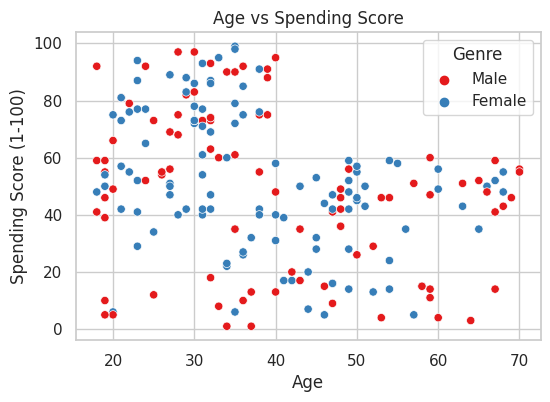

In [9]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = 'Genre', palette = 'Set2')
plt.title("Income vs Spending Score")
plt.show()

plt.figure(figsize = (6,4))
sns.scatterplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = 'Genre', palette = 'Set1')
plt.title("Age vs Spending Score")
plt.show()

### Pair Plot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


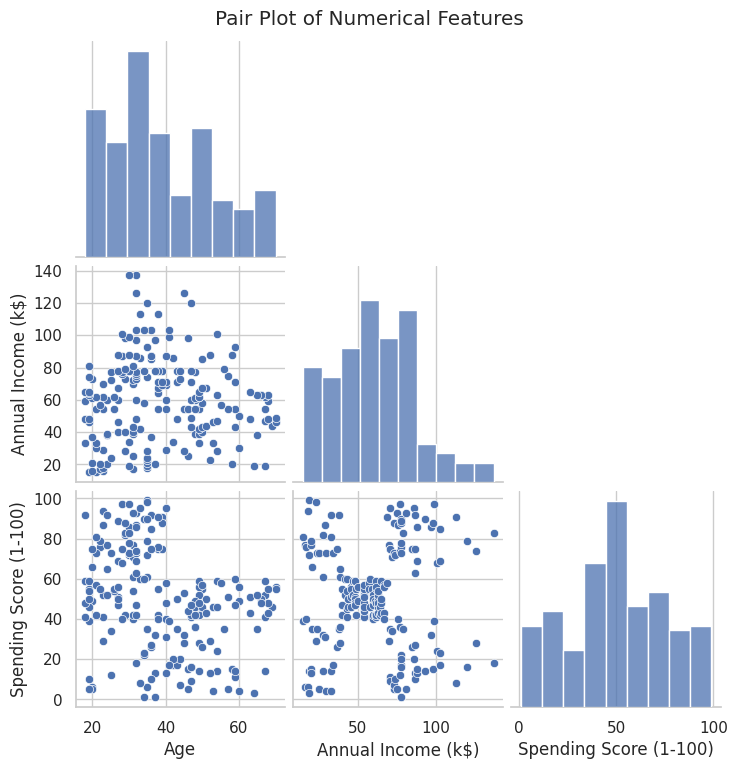

In [10]:
sns.pairplot(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']], corner = True)
plt.suptitle('Pair Plot of Numerical Features', y= 1.02)
plt.show()

# Step 3 : Data Preprocessing

* Drop unnecessary columns (CustomerID)
* Encode categorical features (Gender) if needed
* Standardize/normalize features using StandardScaler

### Drop unnecessary column

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_processed = (df.drop('CustomerID', axis = 1))

### Encode Categorical variable (Genre)

In [12]:
le  = LabelEncoder()
df_processed['Genre'] = le.fit_transform(df_processed['Genre'])

### Feature Scaling

In [13]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(df_processed)

In [14]:
# Convert back to DataFrame for clarity
df_scaled = pd.DataFrame(scaled_feature, columns = df_processed.columns)

#Preview Scaled Data
print(df_scaled.head())

      Genre       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


# Step 4 : Determine Optimal Number of Clusters

* Use Elbow Method (plot inertia vs. k)
* Use Silhouette Score to validate

### Import libraries

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Use df_scaled from preprocessing step
inertia = []
silhouette_scores = []
K = range(2, 11) #trying k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters = k, n_init=10, random_state = 42)
    kmeans.fit(df_scaled)

    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

### Plotting the Elbow Method and Silhouette Score

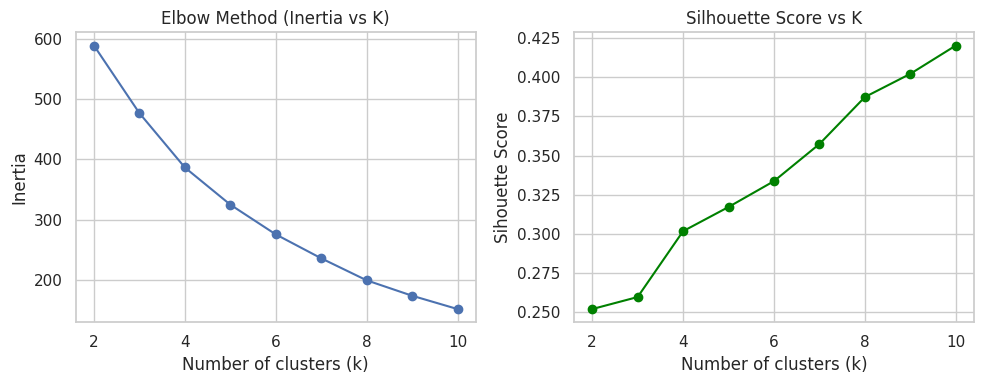

In [16]:
#Plotting the Elbow Method
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker = 'o')
plt.title('Elbow Method (Inertia vs K)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

#Plotting the Sihouette Method
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker = 'o', color = 'green')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sihouette Score')

plt.tight_layout()
plt.show()

# Step 5 :  Apply KMeans Clustering

* Fit model with the chosen number of clusters (e.g., k=5)
* Add cluster labels to the dataframe

### Apply Kmeans with the chosen number of clusters

In [17]:
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

### Add cluster labels to original dataframe

In [18]:
df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


# Step 6 :  Visualize Clusters

* Scatter plots: Income vs Spending Score, color by cluster
* 3D plots (optional): Add Age
* Use seaborn for better visuals

### 2D Scatter plot (Income vs Spending Score)

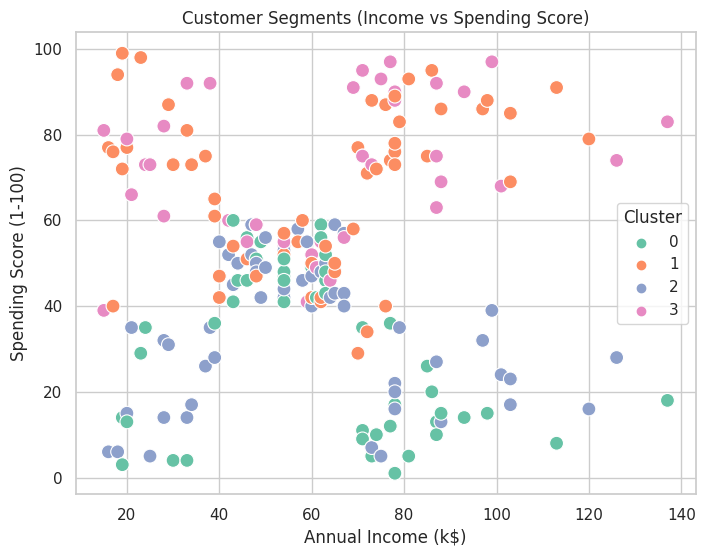

In [19]:
# 2D Scatter plot using seaborn

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### 3D Plot

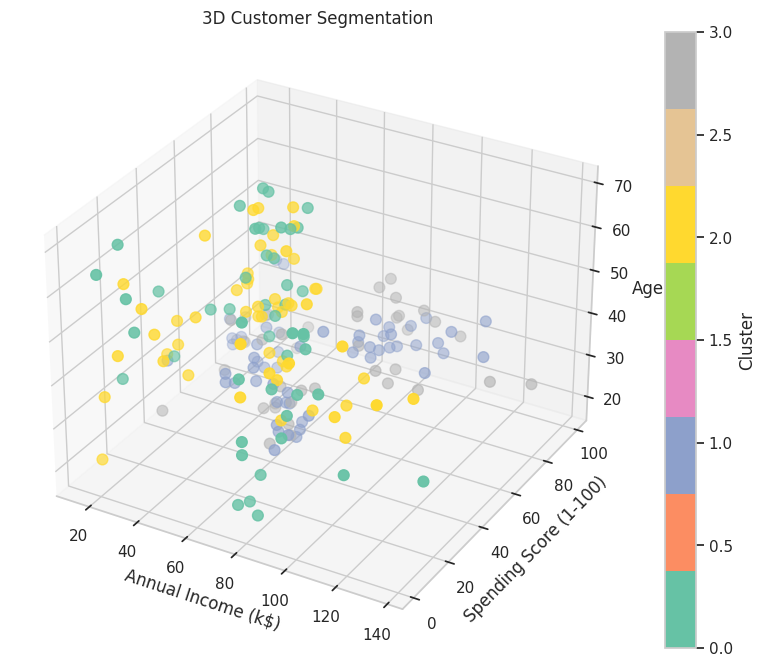

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age'],
    c=df['Cluster'],
    cmap='Set2',
    s=60
)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('3D Customer Segmentation')

plt.colorbar(sc, label='Cluster')
plt.show()

# Step 7 :  Analyze Clusters

* Describe each cluster (e.g., high income + low spending, etc.)
* Profile the customer groups
* Use df.groupby('Cluster').mean() for analysis

 ### Profile Customer Segments

In [21]:
# View average values per cluster
df.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,104.958333,49.437500,62.416667,29.208333
1,100.210526,28.438596,59.666667,67.684211
2,94.818182,48.109091,58.818182,34.781818
3,103.375000,28.250000,62.000000,71.675000


# Cluster Descriptions

Cluster 0: These are older customers with high income but low spending behavior. They may be financially stable but conservative or selective in spending. Possibly savers or cautious buyers.

Cluster 1: Young adults who spend a lot despite average income. They are likely impulsive buyers, possibly influenced by trends or lifestyle, making them a valuable target for marketing.

Cluster 2: Older customers with moderate income and moderate spending. They may be balanced or cautious consumers, making them average or low-priority targets for premium campaigns.

Cluster 3: Young and high-income customers who spend a lot. They are ideal premium customers — financially strong and willing to spend. This cluster is a top target group for luxury or trendy products.

### Visualize cluster centers

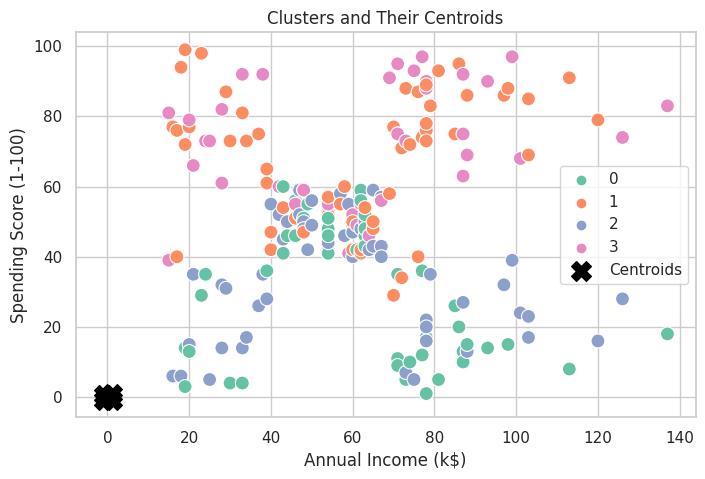

In [22]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('Clusters and Their Centroids')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Conclusion

Through KMeans clustering, we were able to group customers into 4 distinct clusters based on their income and spending patterns:

- **Cluster 0**: Older customers with moderate income and low spending
- **Cluster 1**: Younger customers with moderate income and **very high** spending — potential target group
- **Cluster 2**: Mature customers with moderate spending — stable segment
- **Cluster 3**: Young, high-income customers with **very high** spending — premium target segment



These insights can be used by mall or retail businesses to:
- Launch tailored marketing campaigns
- Offer promotions to high-spending segments
- Design services/products around specific customer groups

Next steps can include:
- Trying other clustering methods (e.g., DBSCAN or Hierarchical Clustering)
- Adding more behavioral features like frequency of visits, product categories, etc.
- Building a dashboard for real-time segmentation analysis